## 1. Instalação das principais bibliotecas que iremos utilizar

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import re as re

# blibliotecas para plotarmos os dados
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")

## 2. Leitura e entendimento dos datasets do titanic

In [2]:
# leitura dos datasets do titanic
# train = leitura do conjunto de dados de treinamento
# test = leitura do conjunto de dados de teste
# submission = vamos utilizar no final da análise
train = pd.read_csv('train.csv', header = 0, dtype={'Age': np.float64})
test  = pd.read_csv('test.csv' , header = 0, dtype={'Age': np.float64})
submission = pd.read_csv('test.csv' , header = 0, dtype={'Age': np.float64})

# full_data é uma estrutura que armazena os nossos 2 datasets, isso irá facilitar nosso trabalho mais para frente
full_data = [train, test]

In [3]:
#vamos dar uma olhada nos dados de treinamento
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#vamos dar uma olhada nos dados de teste
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 3. Conhecendo das variaveís do dataset

In [5]:
# vamos verificar os dados (colunas do nosso dataset)
print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


Das informações acima, podemos ver que algumas colunas estão incompletas (faltando dados) e teremos que tratar isso de alguma maneira.

Iremos passar por cada variável do dataset para entendê-la e, se necessário, tratar os dados nulos.

### 3.1 Pclass - classe de viagem do passageiro

Podemos observar se a classe de viagem do passageiro tem influência na taxa de sobrevivência.

In [6]:
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


### 3.2 Sexo do passageiro
Distribuição de sobreviventes de acordo com o sexo

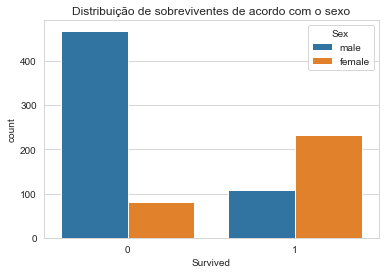

Total de sobreviventes: 342
      Sex  Survived
0  female  0.742038
1    male  0.188908


In [7]:
# utilizando o conjunto de Treinamento vamos observar os dados
p = sns.countplot(data=train, x = 'Survived', hue = 'Sex')
plt.title("Distribuição de sobreviventes de acordo com o sexo")
plt.show()

# variáveis para exibir
total_survived_females = train[train.Sex == "female"]["Survived"].sum()
total_survived_males = train[train.Sex == "male"]["Survived"].sum()

print("Total de sobreviventes: " + str((total_survived_females + total_survived_males)))
print (train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())

### 3.3 SibSp and Parch - tamanho da família


In [8]:
# Mas e o tamanho da família, seria importante?
# podemos criar uma nova variável chamada FamilySize de acordo com 
# número de irmãos por conjuge e numero de pais por filhos abordo

# criamos uma nova variável para cada dataset em full_data chamada FamilySize
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

# informações obtidas do conjunto de treinamento
print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


Se olharmos novamento os dados dos **dataset de treinamento e de teste**, podemos ver que uma nova coluna foi adicionada: **FamilySize**.

In [9]:
# dataset 0 de full_data = dataset de treinamento (train)
full_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [10]:
# dataset 1 de full_data = dataset de teste (test)
full_data[1].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3


O tamanho da família parece ser uma variável influente na taxa de sobrevivência e, portanto, importante para a nossa predição. Mas, vamos mais longe e verificar pessoas que viajaram sozinhas.

In [11]:
# criamos uma nova variável dentro de cada dataset (train e test) chamada IsAlone, assim como fizemos com FamilySize
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
# informações obtidas do conjunto de treinamento
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


Bem, agora podemos considerar que a o fato de a pessoa estar sozinha ou não tem um impacto considerável.

### 3.4 Embarked
Essa variável possui alguns valores nulos. Vamos tentar preencher os valores nulos com o valor que mais ocorre: S.

In [12]:
# dentro de cada dataset (train e teste) corrigimos os valores
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


### 3.5 Fare 
Essa variável possui alguns valores nulos. Vamos tentar preencher os valores nulos com a **mediana** da tarifa.

Analisamos a tarifa em nosso conjunto de treinamento (dividida em 4 categoria diferentes)

In [13]:
# Mediana da tarifa
mediana = train['Fare'].median()
print("Mediana: ",mediana)

Mediana:  14.4542


In [14]:
# dentro de cada dataset (train e teste) dividimos a tarifa paga em 4 categorias diferentes
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median()) #substituimos os nulos pela mediana
    
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)

print (train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


### 3.6 Age 
Essa variável possui alguns valores nulos também. Existem diversar formas de tratar valores nulos em um dataset.
* substituir os valores nulos pela **média da variável**
* substituir os valores nulos de forma aleatória dentro de um intervalo **[média - desvio, média + desvio]**

In [15]:
# observando a média de idade no conjunto de Treinamento
media = train['Age'].mean()
desvio = train['Age'].std()
print("Média da idade:",media)
print("Desvio padrão da idade:",desvio)

Média da idade: 29.69911764705882
Desvio padrão da idade: 14.526497332334044


In [16]:
# dentro de cada dataset (train e teste) corrigimos o campo Age (idade)
for dataset in full_data:
    age_avg = dataset['Age'].mean() #retorna a média da idade
    age_std = dataset['Age'].std()  # retorna o desvio padrão
    age_null_count = dataset['Age'].isnull().sum() #conta a quantidade de campos nulos
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
        
train['CategoricalAge'] = pd.cut(train['Age'], 5)
print (train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.517544
1   (16.0, 32.0]  0.341463
2   (32.0, 48.0]  0.398374
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


C:\Users\carla\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Distribuição de sobreviventes de acordo com a idade

### 3.7 Name 
Nessa variável, conseguimos ver o título da pessoa

C:\Users\carla\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


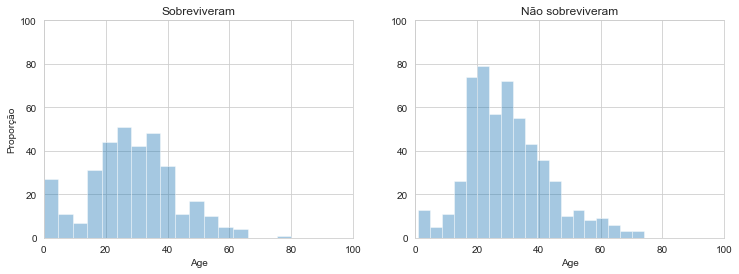

In [17]:
survived_ages = train[train.Survived == 1]["Age"]
not_survived_ages = train[train.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Sobreviveram")
plt.ylabel("Proporção")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Não sobreviveram")
plt.subplots_adjust(right=1.7)
plt.show()

In [18]:
# definimos uma função chamada get_title
def get_title(name):
	title_search = re.search(' ([A-Za-z]+)\.', name)
	# Se o título existir, procure por ele
	if title_search:
		return title_search.group(1)
	return ""

# dentro de cada dataset (train e teste) criamos uma nova coluna chamada Title
for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

print(pd.crosstab(train['Title'], train['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


Agora temos os títulos e sua frequência no nosso dataset. Vamos categorizá-los e verificar seu impacto na taxa de sobrevivência.

In [19]:
# dentro de cada dataset (train e teste) categorizamos a coluna Title
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print (train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


## Limpeza dos dados
Legal, já conhecemos todas as variáveis do nosso dataset.

Agora, vamos limpar nossos dados e transformá-los em valores numéricos. 

In [20]:
# dentro de cada dataset (train e teste) transformamos nossas variáveis em valores numéricos
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4

# Seleção de variáveis que não iremos utilizar
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp',\
                 'Parch', 'FamilySize']

train = train.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

test  = test.drop(drop_elements, axis = 1)

print (train.head(10))

train = train.values
test  = test.values

   Survived  Pclass  Sex  Age  Fare  Embarked  IsAlone  Title
0         0       3    1    1     0         0        0      1
1         1       1    0    2     3         1        0      3
2         1       3    0    1     1         0        1      2
3         1       1    0    2     3         0        0      3
4         0       3    1    2     1         0        1      1
5         0       3    1    2     1         2        1      1
6         0       1    1    3     3         0        1      1
7         0       3    1    0     2         0        0      4
8         1       3    0    1     1         0        0      3
9         1       2    0    0     2         1        0      3


Ótimo! Agora temos um dataset limpo e pronto para montarmos nosso modelo de predição.

## Predição
Agora vamos usar o SVC como nosso classificador.

Mais informações sobre o SVC. 
https://scikit-learn.org/stable/modules/svm.html

<b>a) Importamos as bibliotecas necessárias</b>

In [21]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

<b> b) Criamos o nosso classificador SVC do tipo SVM (Máquinas de Vetores de Suporte) </b>

In [22]:
classifiers = [SVC(probability=True)]
candidate_classifier = SVC()

**c) Treinamos o nosso classificador com o conjunto de treinamento.**

A função ```.fit(X, y) ``` recebe 2 arrays de entrada:
* **X** em forma de matriz ```[elementos, variáveis]``` com todos os elementos do conjunto de treinamento
* **y** em forma de array com o nome das variáveis

Mais informações sobre SVM em python: https://scikit-learn.org/stable/modules/svm.html

In [23]:
candidate_classifier.fit(train[0::, 1::], train[0::, 0])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Testando nosso classificador
Uma forma de validar o classificador é usar a técnica chamada **Cross Validation/Validação Cruzada**.

Abaixo, vamos criar uma função que faz o Cross Validation e nos retorna a acurácia média. A Acurácia, basicamente é o percentual de acertos que modelo teve.

In [24]:
def acuracia(clf,X,y):
    scores = cross_val_score(clf, X, y, cv=5)
    resultados = cross_val_predict(clf, X, y, cv=5)
    print("Cross-validated Scores: ",scores)
    acuracia_media = metrics.accuracy_score(y,resultados)
    print("Acurácia média: ", acuracia_media)
    return None

Como estamos testando nosso classificador usando os dados de treinamento, podemos:
1. executar nosso classificador sobre os **dados de teste**
2. comparar os resultados do classificador com os resultados esperados (armazenados na coluna survived)

In [25]:
# armazenamos os resutados esperados
classes = candidate_classifier.predict(train[0::,1::])

In [26]:
# executamos a função acuracia
acuracia(candidate_classifier,train,classes)

Cross-validated Scores:  [0.96089385 0.97752809 0.97752809 0.98314607 0.98876404]
Acurácia média:  0.9775533108866442


Como podemos ver a acurácia ficou na faixa de 97%! O SVM está funcionando muito bem para esses dados.

Mas precisamos ter em mente que a base de dados do Titanic é uma base pequena e simples, por isso, conseguimos facilmente um bom trabalho do SVM. O objetivo foi apenas mostrar como podemos testar nosso algoritmo de forma prática.

Agora, vamos seguir com a predição dos nossos dados de teste, que, afinal, é o nosso objetivo!

<b>d) Após o treinamento, realizamos a predição com os dados de teste</b>

In [27]:
result = candidate_classifier.predict(test)

Abaixo o print do resultado, uma array de 0's e 1's. Cada valor representa um dos passageiros. 

In [28]:
print (result)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


Lembra-se da nossa variável **submission** que guardou os dados de teste? Agora iremos utilizá-la para saber quem são os passageiros que sobreviveram ou não.

In [29]:
submission.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Criamos um Dataframe para armazenar nossos dados

Um <a href="https://www.tutorialspoint.com/python_pandas/python_pandas_dataframe.htm" targeg="_blank">DataFrame</a> é uma estrutura bidimensional (como uma matriz ou tabela). <br>

Iremos juntar os dados armazenados em <b>submission</b> com os dados gerados pelo nosso classificador (<b>results</b>) e criar uma nova coluna chamada <b>Survived</b> que terá apenas os valores binários (1 - sobreviveu, 0 - não sobreviveu).


In [30]:
final = pd.DataFrame({
        # dados armazenados em submission
        "PassengerId": submission["PassengerId"],
        "Pclass": submission["Pclass"],
        "Pclass": submission["Name"],
        "Sex": submission["Sex"],
        "Age": submission["Age"],
        "FamilySize": submission['SibSp'] + submission['Parch'] + 1,
        # dados armazenados em result
        "Survived": result
    })

#### Após isso, iremos transformar nosso dados em um arquivo csv

In [31]:
final.to_csv("titanic.csv", index=False)
print(final.shape)

(418, 6)


#### Mas, já vamos dar uma olhada no resultado final da nossa predição

In [32]:
final

,PassengerId,Pclass,Sex,Age,FamilySize,Survived
0,892,"Kelly, Mr. James",male,34.5,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,2,1
2,894,"Myles, Mr. Thomas Francis",male,62.0,1,0
3,895,"Wirz, Mr. Albert",male,27.0,1,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3,1
5,897,"Svensson, Mr. Johan Cervin",male,14.0,1,0
6,898,"Connolly, Miss. Kate",female,30.0,1,1
7,899,"Caldwell, Mr. Albert Francis",male,26.0,3,0
8,900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,1,1
9,901,"Davies, Mr. John Samuel",male,21.0,3,0


## Visualizando os resultados da nossa predição
Podemos plotar os dados da nossa estrutura <b>final</b> para visualizar e analisar o resultado da nossa predição

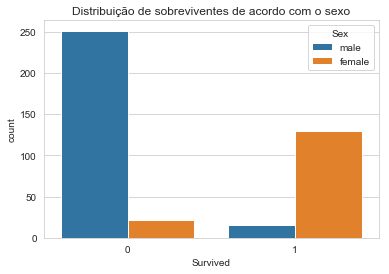

In [35]:
# utilizando o resultado que obtivemos vamos observar os dados
p = sns.countplot(data=final, x = 'Survived', hue = 'Sex')
plt.title("Distribuição de sobreviventes de acordo com o sexo")
plt.show()

In [36]:
print (final[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.260870
1           2  0.445946
2           3  0.578947
3           4  0.500000
4           5  0.428571
5           6  0.666667
6           7  0.250000
7           8  0.000000
8          11  0.000000


O conteúdo do notebook acaba aqui! Espero ter ajudado e procurem novos desafios no <a href="http://kaggle.com" target="_blank">Kaggle</a> para resolver e compartilhar os resultados (e erros haha) com a comunidade.